In [141]:
import os
import rasterio
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
from rasterio import plot
from sklearn.preprocessing import LabelEncoder

from PIL import Image
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix

In [142]:
INF = -3.3999999521443642e+38

In [143]:
soja_tif = list()
urban_tif = list()
arbust_tif = list()

for root, dirs, files in os.walk('./bahia/soja/tif'):
    path = root.split(os.sep)
    path = '/'.join(path)
    for file in files:
        soja_tif.append(os.path.join(path, file))
        
for root, dirs, files in os.walk('./bahia/area_urbana/tif'):
    path = root.split(os.sep)
    path = '/'.join(path)
    for file in files:
        urban_tif.append(os.path.join(path, file))
        
for root, dirs, files in os.walk('./bahia/arbustivo/tif'):
    path = root.split(os.sep)
    path = '/'.join(path)
    for file in files:
        arbust_tif.append(os.path.join(path, file))
        
soja_tif = list(filter(lambda x: x.endswith('.tif'), soja_tif))
urban_tif = list(filter(lambda x: x.endswith('.tif'), urban_tif))
arbust_tif = list(filter(lambda x: x.endswith('.tif'), arbust_tif))

soja_tif = np.asarray(soja_tif)
urban_tif = np.asarray(urban_tif)
arbust_tif = np.asarray(arbust_tif)

In [144]:
X = list()
Y = list()
for i, file in enumerate(soja_tif):
    temp = xr.open_rasterio(file).data
    temp[temp == INF] = 0
    mat = (temp[3]-temp[0])/(temp[3]+temp[0])
    shape = temp.shape
    X.append(mat)
    Y.append(1)
    
for i, file in enumerate(urban_tif):
    temp = xr.open_rasterio(file).data
    temp[temp == INF] = 0
    mat = (temp[3]-temp[0])/(temp[3]+temp[0])
    shape = temp.shape
    X.append(mat)
    Y.append(0)
    
for i, file in enumerate(arbust_tif):
    temp = xr.open_rasterio(file).data
    temp[temp == INF] = 0
    mat = (temp[3]-temp[0])/(temp[3]+temp[0])
    shape = temp.shape
    X.append(mat)
    Y.append(0)
    
X = np.array(X)
Y = np.asarray(Y)

X.shape

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


(108, 20, 20)

In [145]:
X[np.isnan(X)] = -1
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2], 1))
X.shape

(108, 20, 20, 1)

In [123]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(2, 2), 
                      input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                      activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=8, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units = 64, activation = 'tanh'))
model.add(Dropout(.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=300)

Train on 91 samples, validate on 17 samples
Epoch 1/300
91/91 [==============================] - 2s 19ms/step - loss: 0.6770 - acc: 0.6703 - val_loss: 0.6494 - val_acc: 0.7647
Epoch 2/300
91/91 [==============================] - 0s 213us/step - loss: 0.6400 - acc: 0.7582 - val_loss: 0.6172 - val_acc: 0.7647
Epoch 3/300
91/91 [==============================] - 0s 196us/step - loss: 0.6099 - acc: 0.7582 - val_loss: 0.5871 - val_acc: 0.7647
Epoch 4/300
91/91 [==============================] - 0s 202us/step - loss: 0.5745 - acc: 0.7582 - val_loss: 0.5650 - val_acc: 0.7647
Epoch 5/300
91/91 [==============================] - 0s 197us/step - loss: 0.5545 - acc: 0.7582 - val_loss: 0.5567 - val_acc: 0.7647
Epoch 6/300
91/91 [==============================] - 0s 224us/step - loss: 0.5564 - acc: 0.7582 - val_loss: 0.5562 - val_acc: 0.7647
Epoch 7/300
91/91 [==============================] - 0s 230us/step - loss: 0.5329 - acc: 0.7582 - val_loss: 0.5569 - val_acc: 0.7647
Epoch 8/300
91/91 [=======

Epoch 62/300
91/91 [==============================] - 0s 191us/step - loss: 0.4093 - acc: 0.7802 - val_loss: 0.4481 - val_acc: 0.7647
Epoch 63/300
91/91 [==============================] - 0s 205us/step - loss: 0.3987 - acc: 0.8352 - val_loss: 0.4524 - val_acc: 0.7647
Epoch 64/300
91/91 [==============================] - 0s 199us/step - loss: 0.4006 - acc: 0.8462 - val_loss: 0.4360 - val_acc: 0.7647
Epoch 65/300
91/91 [==============================] - 0s 189us/step - loss: 0.3994 - acc: 0.8022 - val_loss: 0.4434 - val_acc: 0.7647
Epoch 66/300
91/91 [==============================] - 0s 195us/step - loss: 0.3936 - acc: 0.8022 - val_loss: 0.4307 - val_acc: 0.7647
Epoch 67/300
91/91 [==============================] - 0s 205us/step - loss: 0.3876 - acc: 0.8132 - val_loss: 0.4376 - val_acc: 0.7647
Epoch 68/300
91/91 [==============================] - 0s 206us/step - loss: 0.4075 - acc: 0.8352 - val_loss: 0.4205 - val_acc: 0.7647
Epoch 69/300
91/91 [==============================] - 0s 193us

Epoch 123/300
91/91 [==============================] - 0s 192us/step - loss: 0.3030 - acc: 0.8901 - val_loss: 0.3023 - val_acc: 0.8824
Epoch 124/300
91/91 [==============================] - 0s 193us/step - loss: 0.3090 - acc: 0.8791 - val_loss: 0.3055 - val_acc: 0.8235
Epoch 125/300
91/91 [==============================] - 0s 220us/step - loss: 0.2836 - acc: 0.8901 - val_loss: 0.3330 - val_acc: 0.9412
Epoch 126/300
91/91 [==============================] - 0s 236us/step - loss: 0.2755 - acc: 0.9121 - val_loss: 0.2847 - val_acc: 0.8824
Epoch 127/300
91/91 [==============================] - 0s 220us/step - loss: 0.2602 - acc: 0.9011 - val_loss: 0.2823 - val_acc: 0.8824
Epoch 128/300
91/91 [==============================] - 0s 230us/step - loss: 0.2631 - acc: 0.9011 - val_loss: 0.2885 - val_acc: 0.8824
Epoch 129/300
91/91 [==============================] - 0s 247us/step - loss: 0.2578 - acc: 0.9011 - val_loss: 0.2847 - val_acc: 0.8824
Epoch 130/300
91/91 [==============================] - 

Epoch 184/300
91/91 [==============================] - 0s 210us/step - loss: 0.2417 - acc: 0.9011 - val_loss: 0.3155 - val_acc: 0.9412
Epoch 185/300
91/91 [==============================] - 0s 232us/step - loss: 0.2332 - acc: 0.9231 - val_loss: 0.2474 - val_acc: 0.8824
Epoch 186/300
91/91 [==============================] - 0s 226us/step - loss: 0.2484 - acc: 0.8901 - val_loss: 0.2450 - val_acc: 0.8824
Epoch 187/300
91/91 [==============================] - 0s 212us/step - loss: 0.2398 - acc: 0.9011 - val_loss: 0.2829 - val_acc: 0.9412
Epoch 188/300
91/91 [==============================] - ETA: 0s - loss: 0.2855 - acc: 0.875 - 0s 250us/step - loss: 0.2441 - acc: 0.9231 - val_loss: 0.2808 - val_acc: 0.9412
Epoch 189/300
91/91 [==============================] - 0s 194us/step - loss: 0.2402 - acc: 0.9121 - val_loss: 0.2541 - val_acc: 0.8824
Epoch 190/300
91/91 [==============================] - 0s 198us/step - loss: 0.2280 - acc: 0.9011 - val_loss: 0.2445 - val_acc: 0.8824
Epoch 191/300
91/

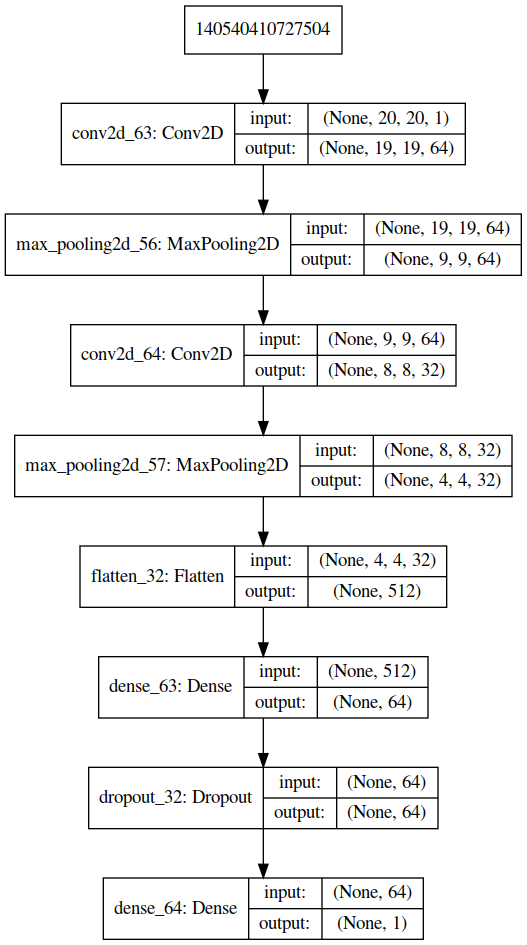

In [121]:
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

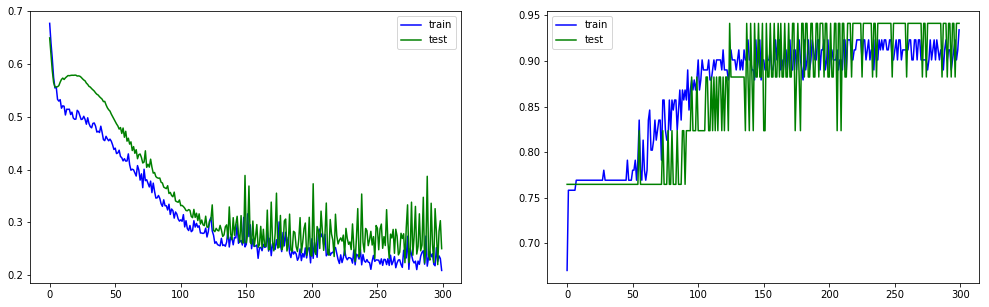

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(17, 5))

ax[0].plot(history.history['loss'], color='blue', label='train')
ax[0].plot(history.history['val_loss'], color='green', label='test')
ax[0].legend()

ax[1].plot(history.history['acc'], color='blue', label='train')
ax[1].plot(history.history['val_acc'], color='green', label='test')
ax[1].legend()

In [134]:
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred[:, 0])

Text(0,0.5,'Ocorrências')

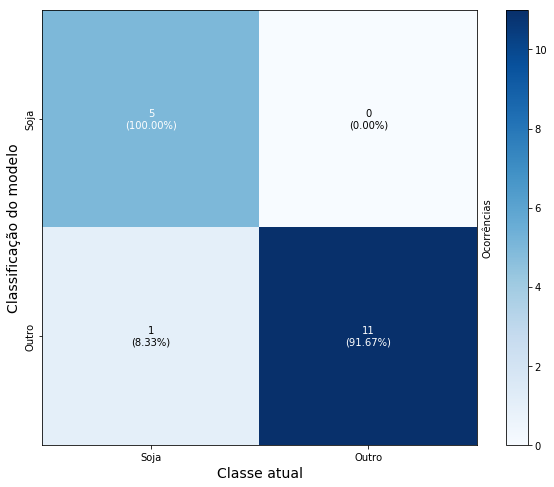

In [140]:
figsize = (15, 8)
fig, ax = plt.subplots(1, 1, figsize=figsize)

cmap = plt.cm.Blues
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.4)

total_samples = cm.sum(axis=1)[:, np.newaxis]
normed_conf_mat = cm.astype('float') / total_samples
labels = ['Soja', 'Outro']
label_font = dict(fontweight='normal', size=14)
title_font = dict(fontweight='normal', size=18)

matshow = ax.matshow(cm, cmap=cmap)
cb = plt.colorbar(matshow, cax=cax, orientation='vertical')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cell_text = str(cm[i, j])
        cell_text += '\n(%.2f%%)' % (normed_conf_mat[i, j] * 100)
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels, rotation=90, va='center')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('Classe atual', fontdict=label_font)
ax.set_ylabel('Classificação do modelo', fontdict=label_font)
cb.ax.set_ylabel('Ocorrências', va='center', rotation=-270, labelpad=-60)